# Setting Up

This project was created to explore applications of heaps and practice computational skills, such as complexity analysis and object-oriented programming. By using heaps, I created a scheduler to organize the daily tasks of a person in the most productive way. Productivity here is evaluated based on the amount of utility that a sequence of tasks provide. Supposing a person lists more tasks than they have time to complete, the scheduler uses a greedy approach to determine which combination is the most optimal.

Additionally, I also considered psychological biases that might influence decision-making. In order to define the utility of a task, I created a formula that accounts for (and corrects) common biases, such as planning fallacy and loss aversion.

# Algorithmic Strategy

### Why is a priority queue a particularly well-suited data structure to prioritize tasks? Why don’t we simply sort a list of tasks?

The first advantage of using a heap comes in the initial structuring of the data. From an array with random values, it is possible to build a heap in O(n) time. On the other hand, if we decided to sort the array to obtain its greatest/smallest value, the fastest algorithms we know (merge sort, quick sort, heap sort) would take O(n log n) time, which is slower.

We must note that creating a heap is different from sorting an array. A heap structures information hierarchically, sorting chunks of elements relative to each other; in a max heap, for example, parent nodes are always greater than their children, but there is no rule determining in which position the greater child should be. Still, for creating a scheduler, there is no need to sort all elements. Instead, we only need to obtain the greatest/smallest element of the group (which is our next task). A heap, therefore, is faster and well-suited for the job.

Additionally, heaps are also better in terms of handling streaming data. It is common for new activities to come up in a day, which requires reorganizing the schedule from that moment on. Heaps can insert elements in O(log n) time. On the other hand, if we used a sorted array to define priority, our best options would be inserting the element with insertion sort (which would take time O(n) time), or appending it to the list and re-sorting it all over again (which would take, with the best sorting algorithms, O(n log n) time). Once again, heaps perform better.

The only benefit of using a sorted array is that the time for removing an element is O(1), while a heap demands O(log n) because it needs to reorganize the heap ("heapify") after the removal. Even this advantage, however, can be questioned: the time of O(1) only happens when removing the last element of the array. Removing the first would require shifting the position of all subsequent elements, which would take O(n) time.

All aspects factored in, using heaps to build a scheduler is better than using sorted arrays.


### How will the scheduler work at a very high level?

The task scheduler starts by taking as input a list of objects. Its very first step is calculating the priority each task should have. The process of calculating priority values is detailed in the following section.

Once priority values are calculated, the scheduler separates tasks into groups. In every routine, there are mainly two kinds of tasks: fixed ones, which start at a specific time of the day (such as having classes), and flexible ones, which can be done at any time. If a task is flexible and contains dependencies, it is placed on a "waitlist" until all its dependencies are concluded. However, if a flexible task does not depend on any other, the scheduler puts it in a max heap. All tasks in a heap are ready to be executed, and the next task chosen is the one with the highest priority value.

Fixed tasks work slightly differently. A fixed task might have dependencies, but it will happen regardless of those. For example, before attending a class, a person might want to do prework. However, the class will happen regardless of whether the person did their prework. For that reason, fixed tasks are placed in a min heap right away and are prioritized based on the time they should start. The dependencies of fixed tasks are essential in determining the utility value of flexible tasks, but they do not prevent the fixed task (such as the class) from happening.

Once this process is over and both heaps are ready, the algorithm compares both heap roots. Specifically, it answers the question: can we complete the next flexible task and have 10 minutes of rest before the beginning of the next fixed task? If yes, the algorithm determines the next task to be the flexible one, and if not, the fixed one. This task is extracted from its heap and printed on the user's screen. The scheduler's clock is also updated, and the task is removed from the dependencies of all tasks in the waitlist.

When running again, the algorithm first checks if it's time for a break. It then evaluates if any tasks in the waitlist are now ready to be moved to the heap, places them in, and the whole comparison process starts again. This algorithm repeats itself until no tasks are left on the waitlist or the heaps.

### How is the priority defined?

To determine the order in which tasks should be performed, each heap uses a priority metric more suitable for its activities. For the heap containing fixed tasks, the priority value is the time of the activity itself: the heap will place first a task that starts at 2 pm, then another at 4 pm, and the last at 10 pm.

However, the heap that handles flexible tasks is designed to maximize utility. The utility of each task is the priority criteria used to organize activities. Being a max heap, this priority queue returns first the activities with the greatest utility available.

Being the priority criteria or not, every task contains a utility value calculated by the same standardized formula.

### How is utility calculated?

The first variable used to calculate utility is the duration of the task. The more tasks I do, the more satisfied I feel, which means utility is inversely proportional to the duration of a task. Consequently: This makes: <br><br><center>__priority = 1/duration__<br>


The second variable that must be factored in is the nature of the task. Academics are my priority at Minerva (weight 5), but I also need work-study to pay for my tuition (weight 3), and routine tasks are unavoidable (weight 1). The formula, as a consequence, becomes:
<br><br><center>__priority = base category weight/duration__<br>

Apart from aspects inherent to each activity, their relative importance also plays a role in the utility they provide (after all, it is extremely rewarding to complete a task that "unlocks" several others). The relative importance of a task is measured by the number of times it appears in the dependencies of others, multiplied by the category weight of the tasks they unlock. For example, a task that unlocks an academic activity is more relevant than a task that unlocks a routine activity. The more activities containing a specific ID in their dependencies, the greater that ID's relative importance.
<br><br><center>__priority = (category weight * relative importance)/duration__<br>

The last step of the calculation involves mitigating psychological biases. Given that fixed tasks will happen regardless of their dependencies having been completed (such as a class happening regardless of a student doing their prework), there is an emotional risk involved in not scheduling a day correctly. For example, being in a meeting without adequate preparation can be draining. 
    
However, due to overconfidence, I tend to act in a risk-seeking manner, wrongly believing I can accomplish more in a day than what is indeed feasible. To avoid the risk of prioritizing quicker tasks, instead of comprehensively meaningful activities, the relative importance of each task is weighted. Any activity a fixed task depends on is ten times relatively more important than an activity required by a flexible task. Therefore:
<br><br><center>__priority = (category weight * weighted relative importance)/duration__<br>

Using such a framework for calculating utility mitigates biases and tackles delays and unforeseeable situations. By correctly evaluating tasks and executing the most important ones first, I decrease the risk of finishing the day without meaningful tasks being accomplished. If the city runs out of power, traffic is hectic, or a friend is celebrating their birthday at the end of the day, I face a smaller tradeoff on not doing the last activities I had planned; the ones I did at the beginning of the day were more important, after all.


# Python Implementation

### Heap classes

In [2]:
class MaxHeapClass:
    """ 
    A class that implements properties and methods 
    that support a max heap data structure

    Attributes
      ----------
      heap : arr
          A Python list where key values in the max heap are stored
      heap_size: int
          An integer counter of the number of keys present in the max heap
    """  

    def __init__(self):    
        """
        Parameters
        ----------
        None
        """    
        self.heap       = []
        self.heap_size  = 0
        
    def left(self, i):
        """
        Takes the index of the parent node
        and returns the index of the left child node

        Parameters
        ----------
        i: int
          Index of parent node

        Returns
        ----------
        int
          Index of the left child node
        """
        
        return 2 * i + 1

    def right(self, i):
        """
        Takes the index of the parent node
        and returns the index of the right child node
        
        Parameters
        ----------
        i: int
            Index of parent node

        Returns
        ----------
        int
            Index of the right child node

        """

        return 2 * i + 2

    def parent(self, i):
        """
        Takes the index of the child node
        and returns the index of the parent node
        
        Parameters
        ----------
        i: int
            Index of child node

        Returns
        ----------
        int
            Index of the parent node

        """

        return (i - 1)//2

    def maxk(self):     
        """
        Returns the highest key in the heap 
        
        Parameters
        ----------
        None

        Returns
        ----------
        int
            Highest key in the heap

        """
        return self.heap[0]     
    
  
    def heappush(self, key):  
        """
        Inserts a key in the heap
        
        Parameters
        ----------
        key: int
            The key value to be inserted

        Returns
        ----------
        None
        """
        self.heap.append(-float("inf"))
        self.increase_key(self.heap_size,key)
        self.heap_size+=1
        
    def increase_key(self, i, key): 
        """
        Modifies the value of a key in a max priority queue
        for a higher value
        
        Parameters
        ----------
        i: int
            The index of the key to be modified
        key: int
            The new key value

        Returns
        ----------
        None
        """
        if key < self.heap[i]:
            raise ValueError('new key is smaller than the current key')
        self.heap[i] = key
        while i > 0 and self.heap[self.parent(i)] < self.heap[i]:
            j = self.parent(i)
            holder = self.heap[j]
            self.heap[j] = self.heap[i]
            self.heap[i] = holder
            i = j    
            
       
    def heapify(self, i):
        """
        Creates a max heap from the index given
        
        Parameters
        ----------
        i: int
            The index of the root node of the subtree to be heapified

        Returns
        ----------
        None
        """
        l = self.left(i)
        r = self.right(i)
        heap = self.heap
        if l <= (self.heap_size-1) and heap[l]>heap[i]:
            largest = l
        else:
            largest = i
        if r <= (self.heap_size-1) and heap[r] > heap[largest]:
            largest = r
        if largest != i:
            heap[i], heap[largest] = heap[largest], heap[i]
            self.heapify(largest)

    def heappop(self):
        """
        Returns the largest key in the max heap
        and removes it from the heap
        
        Parameters
        ----------
        None

        Returns
        ----------
        int
            The max value in the heap that is extracted
        """
        if self.heap_size < 1:
            raise ValueError('Heap underflow: There are no keys in the priority queue ')
        maxk = self.heap[0]
        self.heap[0] = self.heap[-1]
        self.heap.pop()
        self.heap_size-=1
        self.heapify(0)
        return maxk

class MinHeapClass:
    """ 
    A class that implements properties and methods 
    that support a min heap data structure

    Attributes
      ----------
      heap : arr
          A Python list where key values in the max heap are stored
      heap_size: int
          An integer counter of the number of keys present in the heap
    """  
    
    def __init__(self):
        
        self.heap = []
        self.heap_size = 0
    
    def left(self, i):
        """
        Takes the index of the parent node
        and returns the index of the left child node

        Parameters
        ----------
        i: int
          Index of parent node

        Returns
        ----------
        int
          Index of left child node
        
        """
        return 2 * i + 1

    def right(self, i):
        """
        Takes the index of the parent node
        and returns the index of the right child node
        
        Parameters
        ----------
        i: int
            Index of parent node

        Returns
        ----------
        int
            Index of right child node

        """
        return 2 * i + 2

    def parent(self, i):
        """
        Takes the index of the child node
        and returns the index of the parent node
        
        Parameters
        ----------
        i: int
            Index of child node

        Returns
        ----------
        int
            Index of parent node

        """
        return (i - 1)//2
        
    def mink(self):
        """
        Returns the lowest key in the heap 
        
        Parameters
        ----------
        None

        Returns
        ----------
        int
            The lowest key in the heap

        """
        return self.heap[0]    
    
    def heappush(self, key):
        """
        Inserts a key into the heap
        
        Parameters
        ----------
        key: int
            The key value to be inserted

        Returns
        ----------
        None
        """
        self.heap.append(float("inf"))
        self.decrease_key(self.heap_size,key)
        self.heap_size+=1
        
    def decrease_key(self, i, key): 
        """
        Modifies the value of a key in a min heap
        for a lower value
        
        Parameters
        ----------
        i: int
            The index of the key to be modified
        key: int
            The new key value

        Returns
        ----------
        None
        """
        if key > self.heap[i]:
            raise ValueError('new key is greater than the current key')
        self.heap[i] = key
        while i > 0 and self.heap[self.parent(i)] > self.heap[i]:
            j = self.parent(i)
            holder = self.heap[j]
            self.heap[j] = self.heap[i]
            self.heap[i] = holder
            i = j 
                 
    def heapify(self, i):
        """
        Creates a min heap from the index given
        
        Parameters
        ----------
        i: int
            The index of the root node of the subtree to be heapified

        Returns
        ----------
        None
        """
        l = self.left(i)
        r = self.right(i)
        heap = self.heap
        if l <= (self.heap_size-1) and heap[l]<heap[i]:
            smallest = l
        else:
            smallest = i
        if r <= (self.heap_size-1) and heap[r] < heap[smallest]:
            smallest = r
        if smallest != i:
            heap[i], heap[smallest] = heap[smallest], heap[i]
            self.heapify(smallest)

    def heappop(self):
        """
        Returns the smallest key in the min heap
        and removes it from the heap
        
        Parameters
        ----------
        None

        Returns
        ----------
        int
            Min value in the heap that is extracted
        """
        if self.heap_size < 1:
            raise ValueError('Heap underflow: There are no keys in the priority queue ')
        mink = self.heap[0]
        self.heap[0] = self.heap[-1]
        self.heap.pop()
        self.heap_size-=1
        self.heapify(0)
        return mink

### Test cases for the heaps

Below are test cases for the main functions of the heaps: heappush, heappop, increase/decrease key, and max/min key. Functions parent, left_child, right_child, and heapify are used inside the previously mentioned one.

In [3]:
maxheap = MaxHeapClass()
myminheap = MinHeapClass()

# populates heaps
maxheap.heappush(1)
maxheap.heappush(7)
maxheap.heappush(14)
maxheap.heappush(16)
maxheap.heappush(4)
maxheap.heappush(8)
maxheap.heappush(5)
maxheap.heappush(12)

myminheap.heappush(1)
myminheap.heappush(7)
myminheap.heappush(14)
myminheap.heappush(16)
myminheap.heappush(4)
myminheap.heappush(8)
myminheap.heappush(5)
myminheap.heappush(12)

# evaluates if hierarchy is correct
try:
    print("Testing insertion:")
    assert maxheap.heap == [16, 14, 8, 12, 4, 7, 5, 1]
    assert myminheap.heap == [1, 4, 5, 12, 7, 14, 8, 16]
    print("    ✅ Test succeeded!")
except:
    print("    ❌ Test failed")
    
maxheap.increase_key(2, 21)
maxheap.increase_key(6, 18)
myminheap.decrease_key(2, -3)
myminheap.decrease_key(6, 0)

# evaluates if key increases and decrease work correctly
try:
    print("Testing key increase and decrease:")
    assert maxheap.heap == [21, 14, 18, 12, 4, 7, 16, 1]
    assert myminheap.heap == [-3, 4, 0, 12, 7, 14, 1, 16]
    print("    ✅ Test succeeded!")
except:
    print("    ❌ Test failed")

maxheap.heappop()
maxheap.heappop()
myminheap.heappop()
myminheap.heappop()

# evaluates if pop works
try:
    print("Testing element retrieval")
    assert maxheap.heap == [16, 14, 7, 12, 4, 1] 
    assert myminheap.heap == [1, 4, 14, 12, 7, 16] 
    print("    ✅ Test succeeded!")
except:
    print("    ❌ Test failed")

Testing insertion:
    ✅ Test succeeded!
Testing key increase and decrease:
    ✅ Test succeeded!
Testing element retrieval
    ✅ Test succeeded!


### Activity scheduler implementation

In [13]:
class Task:
    """ 
    A class that implements attributes representing a task from someone's routine
    
    """  
    
    def __init__(self, id, desc, dur, time="00:00", status="Not ready", dependencies=[], category="Routine", prior=0):
        '''
        Attributes
          ----------
        id : int
            A unique identifier among all tasks
        description: str
            A human-readable description of what the task is
        duration: int
            Number of minutes necessary to complete the task
        time: str
            The time in which the activity should start, if there is one (set to 00:00 by default)
        status: str
            The status of the task in relation to its priority queue (set to 'Not Ready' by default)
        dependencies: list
            List containing identifiers of the tasks that must be performed before the current one (empty by default)
        category: str
            A classification of the type of task (Academic, Work Study, or Routine), set to Routine by default
        priority: float
            The priority value of the task, initially set to 0 

        '''
        self.id = id
        self.description = desc
        self.duration = dur
        self.time = int(time[:-3]) * 60 + int(time[-2:]) # converts HH:mm to minutes
        self.status = status
        self.dependencies = dependencies
        self.category = category
        self.priority = prior

    
    def __repr__(self):
        '''
        Returns a printable representation of the object
        
        Parameters
        ----
        None
        
        Returns
        ----
        rep: str
            Text representing the object
        '''
        
        rep = "task " + str(self.id)
        return rep

    def __lt__(self, other):
        '''
        Determines the criteria to compare is an object is smaller than another
        
        Parameters
        ----
        other: Task object
        
        Returns
        ----
        bool
            Boolean indicating whether the object who called the method is smaller than the other object
            
        '''
        if isinstance(other, Task):
            return self.priority < other.priority
        else:
            return self.priority < other
        
    def __gt__(self, other):
        '''
        Determines the criteria to compare is an object is greater than another
        
        Parameters
        ----
        other: Task object
        
        Returns
        ----
        bool
            Boolean indicating whether the object who called the method is greater than the other object
            
        '''
        if isinstance(other, Task):
            return self.priority > other.priority
        else:
            return self.priority > other

class TaskScheduler:
    """ 
    A class that implements attributes and methods 
    necessary to create a schedule of activities

    Attributes
      ----------
    dependent_flexible_tasks: list
        List of tasks that are flexible but can't go to the heap yet for containing dependency
    activity_counter: list
        Stores the number of activities executed per category
    clock: int
        Counter to keep track of time of the day
    total_time_spent: int
        Counter of time spent executing activities
    time_since_break: int
        Counter of time elapsed since last break
    flexibles_heap: MaxHeapClass object
        Heap that compares and prioritizes flexible tasks
    fixed_heap: MinHeapClass object
        Heap that compares and prioritizes fixed tasks
        
    """  
        
    def __init__(self, tasks, initial_time):
        '''
        Initializes an instance of the scheduler
        
        Parameters
        ----
        tasks: list 
            List containing Task objects to be ordered
        initial_time: str
            Starting time of the scheduler
        
        Returns
        ----
        None
        '''
        
        self.calculate_priority(tasks)
        
        self.dependent_flexible_tasks = []
        self.activity_counter = [0,0,0]
        self.clock = initial_time
        self.total_time_spent = 0
        self.time_since_break = 0
        
        self.flexibles_heap = MaxHeapClass()
        self.fixed_heap = MinHeapClass() 
        
        for task in tasks:
            self.add_new_task(task)
        
    def __eq__(self, other):
        '''
        Determines the criteria to compare is an object is equal to another
        
        Parameters
        ----
        other: TaskScheduler object
        
        Returns
        ----
        bool
            Boolean indicating whether the object who called the method is equal to the other object
        
        '''
        if isinstance(self, other.__class__):
            return self.dependent_flexible_tasks == other.dependent_flexible_tasks and self.flexibles_heap.heap == other.flexibles_heap.heap and self.fixed_heap.heap == other.fixed_heap.heap
        return False
            
    
    def calculate_priority(self, tasks):
        '''
        Calculates the priority of each task based on their individual
        properties and their relevance relative to other tasks
        
        Parameters
        ----
        task: Task object 
            Instance of Task class representing a single activity
        
        Returns
        ----
        None
        '''

        self.all_dependencies = [] # stores dependencies of all tasks together
        
        for task in tasks:
            if task.time != 0: # given loss avertion, dependencies of fixed tasks have a weight of 10x
                self.all_dependencies.extend(task.dependencies*10) 
            else:
                # unlocking tasks from different categories bring different utilities
                if task.category == "Routine":
                    self.all_dependencies.extend(task.dependencies)
                elif task.category == "Work Study":
                    self.all_dependencies.extend(task.dependencies*3)
                elif task.category == "Academic":
                    self.all_dependencies.extend(task.dependencies*5)
        
        for task in tasks:
            # applies base category weight, relative importance, and duration
            if task.category == "Routine":
                task.utility = (1 + self.all_dependencies.count(task.id))/task.duration
            elif task.category == "Work Study":
                 task.utility = ((3 + self.all_dependencies.count(task.id)))/task.duration
            elif task.category == "Academic":
                 task.utility = ((5 + self.all_dependencies.count(task.id)))/task.duration
    
    def add_new_task(self, task):
        '''
        Adds an individual task to the heap it belongs, or to a wait list 
        in case its dependencies are yet to be executed
        
        Parameters
        ----
        task: Task object 
            Instance of Task class representing a single activity
        
        Returns
        ----
        None
        
        '''
        
        # if a task is flexible and dependent, it cannot be heapified yet, so it goes to a wait list
        if task.dependencies != [] and task.time == 0: 
            self.dependent_flexible_tasks.append(task)
        else:
            self.push_to_correct_heap(task)

    def push_to_correct_heap(self, task):
        '''
        Determines in which heap a task belongs to and places it there
        
        Parameters
        ----
        task: Task object 
            Instance of Task class representing a single activity
        
        Returns
        ----
        None
        
        '''
        if task.time == 0: # checks if the task is fixed or flexible
            
            # if a flexible task has no dependencies AND is not yet in the heap:
            if task.status == 'Not ready' and task.dependencies == []:
                self.flexibles_heap.heappush(task) # places task inside its heap
                task.status = "In queue" # updates its status to inform it was placed in
        
        else:
            if task.status == 'Not ready':
                self.fixed_heap.heappush(task)
                task.status = "In queue"
        
    def check_unscheduled_tasks(self):
        '''
        Checks if there are flexible tasks not yet in the heap
        
        Parameters
        ----
        None
        
        Returns
        ----
        Bool
            Boolean indicating whether there are flexible tasks still not inside the heap
        
        '''
        for task in self.dependent_flexible_tasks:
            if task.status == "Not ready":
                return True  
        return False
    
    def clear_dependency(self, id):
        '''
        Removes a recently-executed task from the dependency lists of other tasks
        
        Parameters
        ----
        id: int
            The unique identifier of the recently-executed task
        
        Returns
        ----
        None
        
        '''
        for task in self.dependent_flexible_tasks:
            if id in task.dependencies:
                task.dependencies.remove(id)
    
    def break_is_needed(self):
        '''
        Evaluates if a break is needed (breaks happen after every block of 60 minutes executing tasks)
        
        Parameters
        ----
        None
        
        Returns
        ----
        None
        
        '''
        if self.time_since_break > 60:
            print(f"🍃 {self.clock//60:02d}:{self.clock%60:02d} 🍃")
            print("Time for a break!")
            print("    Go have some rest and come back in 10 minutes 😅\n")
            
            self.clock += 10
            self.time_since_break = 0
            return True
        
    def count_activity(self, task):
        '''
        Keeps track of how many activities from each category have been executed
        
        Parameters
        ----
        task: Task object
            The task that has been recently executed
        
        Returns
        ----
        None
        
        '''
        
        if task.category == "Academic":
            self.activity_counter[0] +=1
        elif task.category == "Work Study":
            self.activity_counter[1] +=1
        else:
            self.activity_counter[2] +=1
            
    
    def execute_task(self): # indicates single next task to be executed
        '''
        Determines next best activity and prints it
        
        Steps:
        1. Evaluates if all tasks without dependencies are in their heaps, and places them there, if not
        
        2. Compares the most important fixed and flexible tasks and picks one
            2.1. If, before the beginning of the next fixed task, we can complete the most optimal flexible task
            and still have a 10 minute break, we'll go for the flexible task
            2.2. If this is not possible, we just wait until the starting time of the next fixed task
        
        3. Prints information about the next task
        
        4. Based on the duration of the task, updates:
            - the overall clock, 
            - the clock that counts how long it has been since the last break
            - the clock that counts the total time spent executing tasks
            - the counter of tasks per category
            - and also eliminates this task from the dependency list of other tasks
        
        Parameters
        ----
        None
        
        Returns
        ----
        None
        
        '''
        
        if self.break_is_needed():
            return
        
        # STEP 1
        if self.check_unscheduled_tasks():
            for task in self.dependent_flexible_tasks:
                self.push_to_correct_heap(task)
        
        # STEP 2
        # checks for edge cases of one of the heaps becoming empty
        if self.flexibles_heap.heap == []:
            next_task = self.fixed_heap.heappop()
            self.clock = next_task.time
        
        elif self.fixed_heap.heap == []:
            next_task = self.flexibles_heap.heappop()
        
        # steps 2.1 and 2.2
        else:
            next_flexible = self.flexibles_heap.maxk()
            next_fixed = self.fixed_heap.mink()
        
            if next_flexible.duration + self.clock + 10 <= next_fixed.time:
                next_task = self.flexibles_heap.heappop()
            else:
                next_task = self.fixed_heap.heappop()
                self.clock = next_task.time
        
        # STEP 3
        print(f"🕰 {self.clock//60:02d}:{self.clock%60:02d}")
        print(f"➡️ Next task you should do:")
        print(f"    {next_task.description}, which will take {next_task.duration} minutes \n")
        
        # STEP 4
        self.count_activity(next_task)
        self.clock += next_task.duration
        self.time_since_break += next_task.duration
        self.total_time_spent += next_task.duration
        self.clear_dependency(next_task.id)
    
    def print_schedule(self):
        '''
        Prints entire schedule for the day
        
        Parameters
        ----
        None
        
        Returns
        ----
        None
        
        '''
        initial_time = self.clock
        
        print("☀️ Good morning! It's time to get up and rock one more day ☀️")
        print("Here is your list of activities. As always, have a good one, and don't forget to keep hydrated! 💦 \n\n")
        
        # process keeps running until there are no unscheduled tasks and both heaps are empty
        while self.check_unscheduled_tasks() or self.fixed_heap.heap or self.flexibles_heap.heap:
            self.execute_task()
        
        final_time = self.clock - initial_time
        
        print("\n📈 DAILY TRACK 📈\n")
        print(f"📌 Today you spent {self.total_time_spent//60:02d}h{self.total_time_spent%60:02d}min on scheduled tasks.")
        print(f"📌 You did {self.activity_counter[0]} academic tasks, {self.activity_counter[1]} work-study tasks, and {self.activity_counter[2]} routine tasks. Congrats!")
        print("\nNow that you're done, enjoy the day for a bit! You deserve it 🍹")
        
        

### Demonstration of scheduler for a day

In [14]:
# creates sample list of tasks
task1 = Task(1, "Wake up, have breakfast and read the news", 35, dependencies=[])
task2 = Task(2, "Prep for CS110 class", 180, dependencies=[1], category="Academic")
task3 = Task(4, "Meditate in Buddhist temple", 25, dependencies=[1])
task4 = Task(5, "Evaluate applications", 60, dependencies=[1], category="Work Study")
task5 = Task(6, "Buy/sell Bitcoin", 20, dependencies=[1])

activity1 = Task(7, "Attend CS110 class", 90, "14:00", dependencies=[2], category = "Academic")
activity2 = Task(8, "Meet Lisa at Shilin Night Market", 60, "20:00", dependencies=[5])
activity3 = Task(9, "Visit Yehliu Geopark", 60, "17:00", dependencies=[])

all_tasks = [task1, task2, task3, task4, task5, activity1, activity2, activity3]
scheduler = TaskScheduler(all_tasks, 7*60 + 30)
scheduler.print_schedule()

☀️ Good morning! It's time to get up and rock one more day ☀️
Here is your list of activities. As always, have a good one, and don't forget to keep hydrated! 💦 


🕰 07:30
➡️ Next task you should do:
    Wake up, have breakfast and read the news, which will take 35 minutes 

🕰 08:05
➡️ Next task you should do:
    Prep for CS110 class, which will take 180 minutes 

🍃 11:05 🍃
Time for a break!
    Go have some rest and come back in 10 minutes 😅

🕰 11:15
➡️ Next task you should do:
    Buy/sell Bitcoin, which will take 20 minutes 

🕰 11:35
➡️ Next task you should do:
    Evaluate applications, which will take 60 minutes 

🍃 12:35 🍃
Time for a break!
    Go have some rest and come back in 10 minutes 😅

🕰 12:45
➡️ Next task you should do:
    Meditate in Buddhist temple, which will take 25 minutes 

🕰 14:00
➡️ Next task you should do:
    Attend CS110 class, which will take 90 minutes 

🍃 15:30 🍃
Time for a break!
    Go have some rest and come back in 10 minutes 😅

🕰 17:00
➡️ Next task you

# Test Drive


### Critical analysis

Using an algorithm to determine one's daily schedule has advantages that cannot be ignored. The first lies on how decision-making becomes rational rather than emotional: events that cause frustration or anger, for example, do not distract us from optimal choices. By applying the same criteria to all tasks, we ensure the path followed is the best, maximizing the utility obtained. It also decreases the time necessary to choose what to do next: for undecided people, this is especially useful, saving a lot of time and mental energy.

However, there are limitations still not addressed by the scheduler. The first relates to how the utility formula is still far from optimal. The cognitive process that evaluates utility is more complex than I understand. As a consequence, the sequence determined by the schedule might not be the one that would maximize utility in real life. 

Second, even though the scheduler allows for unforeseen tasks to be added in the middle of the day, it does not incorporate delays and actual execution times. If a bus takes too long to come or a task takes less time than planned, the scheduler needs to incorporate this information and adjust the predictions for the next activities according to it. Not doing so makes the times printed in the schedule imprecise and leads to a third failure mode: not considering the possibility that some tasks won't be executed. It is normal that plans and conditions change, which makes a day diverge from the plan. Currently, the schedule does not support the removal of a scheduled task, which makes it unrealistic if an activity has to be skipped: not executing a task would lead to different utility calculations, priorities, and a different sequence of activities.

Last, the code was designed based on a list of assumptions:
- Users won't add more tasks than they have time in a day to complete
- Users won't commit input error, such as listing as dependency a task that does not exist
- Users won't multitask, performing one activity only after another one is done

### Efficiency of the algorithm

To perform a complexity analysis, I will create random tasks, place them inside the scheduler, and keep track of time. The first step, then, is to create the random tasks. Below I implement the classes and lists that will support the random creation of tasks.

For the start_time() function, I assume that most tasks in my day are flexible, and only about a tenth are fixed. Therefore, the function creates a starting time 1/10 of the times it is called. This will make only 1/10 of the activities to be fixed.

In [18]:
import random

def start_time():
    '''
    Creates a random start time for an activity
    
    Input
    -----
    None
    
    Output
    -----
    str
        a random string representing start time
    '''
    
    if random.randrange(1, 10) == 1:
        return random.choice(hours) + ":" + str(random.choice(minutes))
    else:
        return "00:00" 

def dependency_creator(task_num):
    '''
    Creates a list of dependencies based on all previously created tasks. First, it calculates
    how many dependencies a task will have. Then, it randomly samples the ids that will constitute
    the dependency list.
    
    Input
    -----
    task_num: int
        The id of the current task
    
    Output
    -----
    lst
        A list of dependencies
    '''
    dependencies = []
    if task_num < 1:
        return dependencies
    else:
        num_of_dep = random.randrange(0, task_num)
        
        for j in range(num_of_dep):
            dependencies.append(random.randrange(0, task_num))
    return dependencies


hours = ["00","01","02","03","04","05","06","07","08","09","10","11","12","13","14","15","16","17","18","19","20","21", "22","23"]
minutes = [i for i in range(10, 60)]
duration = [i for i in range(1, 60)]
categories = ["Academic", "Work Study", "Routine"]
description = "any description string"
status = "Not ready"

Next, I test if this model works by creating 5 different tasks and seeing if the scheduler breaks down in any way. As we can see, the tasks were correctly created, and the scheduler uses it accordingly.

In [21]:
def task_creator(num_of_tasks):
    
    tasks = []

    for i in range(num_of_tasks):
        identifier = i
        desc = description
        dur = random.choice(duration)
        start = start_time()
        depend = list(set(dependency_creator(i))) # set avoids repeated dependencies
        cat = random.choice(categories)

        tasks.append(Task(identifier, str(identifier), dur, start, status, depend, cat))
    
    return tasks

tasks = task_creator(5)

for task in tasks:
    print(f" Task {task.id}, starting time {task.time}, dependencies {task.dependencies}")

print("\n")
scheduler2 = TaskScheduler(tasks, 7*60 + 30)
scheduler2.print_schedule()

 Task 0, starting time 0, dependencies []
 Task 1, starting time 0, dependencies []
 Task 2, starting time 0, dependencies [1]
 Task 3, starting time 0, dependencies [1]
 Task 4, starting time 0, dependencies [3]


☀️ Good morning! It's time to get up and rock one more day ☀️
Here is your list of activities. As always, have a good one, and don't forget to keep hydrated! 💦 


🕰 07:30
➡️ Next task you should do:
    0, which will take 30 minutes 

🕰 08:00
➡️ Next task you should do:
    1, which will take 58 minutes 

🍃 08:58 🍃
Time for a break!
    Go have some rest and come back in 10 minutes 😅

🕰 09:08
➡️ Next task you should do:
    2, which will take 52 minutes 

🕰 10:00
➡️ Next task you should do:
    3, which will take 20 minutes 

🍃 10:20 🍃
Time for a break!
    Go have some rest and come back in 10 minutes 😅

🕰 10:30
➡️ Next task you should do:
    4, which will take 57 minutes 


📈 DAILY TRACK 📈

📌 Today you spent 03h37min on scheduled tasks.
📌 You did 3 academic tasks, 1 work-

After, I designed a full experiment, which allows me to observe the scaling behavior of the scheduler. I specifically designed it to include not only the average of runtimes, but also the upper and lower bounds. With this information, I will be able to infer the scheduler's Big-O, Big-Omega, and Big-Theta (in case it exists).

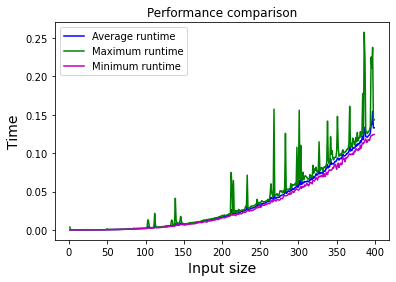

In [133]:
# Complexity analysis
import time
import matplotlib.pyplot as plt

max_input_size = 400
repeats = 15

input_sizes = [i for i in range(1,max_input_size)]
avg_times = []
upper_bounds = []
lower_bounds = []



for i in range(1, max_input_size):
    
    max_time = 0
    min_time = float("inf")
    time_sum = 0
    
    for j in range(repeats):
        tasks = task_creator(i)
        
        initial_time = time.perf_counter()
        scheduler2 = TaskScheduler(tasks, 7*60)
        end_time = time.perf_counter()
        
        time_sum += end_time - initial_time
        max_time = max(max_time, end_time - initial_time)
        min_time = min(min_time, end_time - initial_time)
    
    avg_times.append(time_sum/repeats)
    upper_bounds.append(max_time)
    lower_bounds.append(min_time)


plt.plot(input_sizes, avg_times, c = "blue", label = "Average runtime")
plt.plot(input_sizes, upper_bounds, c = "green", label = "Maximum runtime")
plt.plot(input_sizes, lower_bounds, c = "m", label = "Minimum runtime")
plt.title("Performance comparison")
plt.xlabel("Input size", fontsize = 14)
plt.ylabel("Time", fontsize = 14)
plt.legend()

plt.show() 

As we can observe, the time complexity of the algorithm seems to be Theta(n^2). This happens due to the fact that both upper and lower bounds scale equally as the input size grows. Due to the fact that the scheduler has O(n^2) and Omega(n^2), both bounds are tight, which allows us to infer a Big Theta for the algorithm (in this case, Theta(n^2).

### An important note

This scaling behavior was actually expected. When we analyze the algorithm closely, we can notice a bottleneck related to the way it eliminates dependencies. Every time a task is completed, the scheduler evaluates the list of dependent tasks to clear their dependencies. This is done with a for loop, which runs through all tasks in the list, even though many of them might not have in their dependency the task that was just completed. 

To demonstrate how much of a bottleneck that is, we shall observe the scheduler's behavior when there are no dependencies to check. I implemented this experiment below.

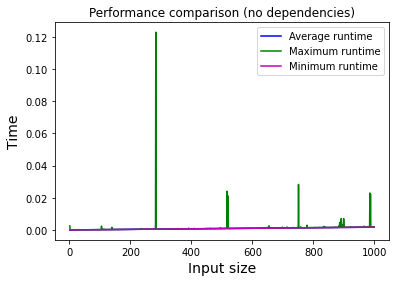

In [129]:
def light_task_creator(num_of_tasks):
    
    tasks = []

    for i in range(num_of_tasks):
        identifier = i
        desc = description
        dur = random.choice(duration)
        start = start_time()
        depend = []
        cat = random.choice(categories)

        tasks.append(Task(identifier, desc, dur, start, status, depend, cat))
    
    return tasks

max_input_size = 1000
repeats = 50

input_sizes = [i for i in range(1,max_input_size)]
avg_times = []
upper_bounds = []
lower_bounds = []

for i in range(1, max_input_size):
    
    max_time = 0
    min_time = float("inf")
    time_sum = 0
    
    for j in range(repeats):
        tasks = light_task_creator(i)
        
        initial_time = time.perf_counter()
        scheduler2 = TaskScheduler(tasks, 7*60)
        end_time = time.perf_counter()
        
        time_sum += end_time - initial_time
        max_time = max(max_time, end_time - initial_time)
        min_time = min(min_time, end_time - initial_time)
    
    avg_times.append(time_sum/repeats)
    upper_bounds.append(max_time)
    lower_bounds.append(min_time)


plt.plot(input_sizes, avg_times, c = "blue", label = "Average runtime")
plt.plot(input_sizes, upper_bounds, c = "green", label = "Maximum runtime")
plt.plot(input_sizes, lower_bounds, c = "m", label = "Minimum runtime")
plt.title("Performance comparison (no dependencies)")
plt.xlabel("Input size", fontsize = 14)
plt.ylabel("Time", fontsize = 14)
plt.legend()

plt.show() 

Eliminating the maximum runtime line to better observe the results:

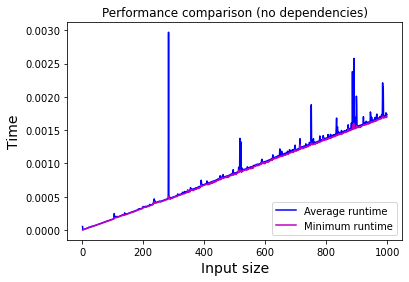

In [130]:
plt.plot(input_sizes, avg_times, c = "blue", label = "Average runtime")
plt.plot(input_sizes, lower_bounds, c = "m", label = "Minimum runtime")
plt.title("Performance comparison (no dependencies)")
plt.xlabel("Input size", fontsize = 14)
plt.ylabel("Time", fontsize = 14)
plt.legend()

plt.show() 

As we can see, once the bottleneck of removing dependencies is eliminated, the scheduler's time complexity is Theta(n), growing linearly as the input size scales.

# Skills applied

__Algorithmic strategy__: First, I explained why using two heaps, instead of one, was better for the context of this problem. I then explained in simple terms how the algorithm should work, described the structure in which the heaps would be inserted (the other parts of the scheduler, such as the dependency checking process), and devised a strategy that reduces runtime (inserting elements without dependencies straight into the heap, and then avoiding unnecessary checking by remove_dependencies). 

__Computational critique__: First, I discussed two possible ways of creating a scheduler (using a sorted list or a heap) and theoretically detailed why one of them was better. I also compared the pros and cons of each approach, acknowledging that the other approach had a strength that heaps did not (popping in heap requires heapifying (O(log n)), while in a sorted array it's O(1)). After the implementation, I created experiments that showed a time complexity of θ(n^2). I explained why the scheduler's complexity was greater than a heap's complexity (the full algorithm is more than just the heaps), identified which part of the algorithm caused a bottleneck, and showed how the complexity would change to θ(n) if that problem was solved. Last, I explained how an improvement could be made using a graph, detailing how that data structure would help eliminate the algorithm's bottleneck.

__Python programming__: I created two classes from scratch (Task and TaskScheduler), implemented their methods, and adjusted both so that they would work together smoothly. As we were instructed not to use external libraries, I created ways to convert time into a format that can be computed (from string to int). To prove that the code works, I created an assert statement to show that different inputs would result in the same schedule. I devised ways to reduce the space usage of the algorithm (instead of storing all tasks, I just keep in memory the ones that are not yet in the heaps) and decrease its runtime. Overall, through OOP, I implemented a sophisticated working schedule.

__Code readability__: the entire algorithm was crafted to be clean and easy to read. Comments were added to justify algorithmic choices or clarify aspects that were not trivial. Docstrings were used to illustrate the functionality of each method. Whenever possible, blocks of code were transformed into separate methods to facilitate understanding. All variables are appropriately named and, in the only method that is unusually large (execute_task), a docstring and a few comments illustrate the way it works. 

__Professionalism__: I produced a written report and .ipynb file containing explanations and code. No matter which one the reader chooses, it is complete, detailed, and easy to understand. The language used in both was direct and professional. APA standards were applied in the written report, following all of Minerva's guidelines.

__Complexity analysis__:  I correctly inferred the theoretical scaling growth of the scheduler, identifying which part of the algorithm caused the time complexity of θ(n^2), and later implemented experiments to demonstrate that. I also correctly noted that the complexity would be reduced in case a specific problem was solved, and also demonstrated that experimentally. Last, I explained what scaling growth was and why we could describe the algorithm's complexity using the Big Theta notation, connecting it to the Big-O and Big Omega notations and the concepts of upper/lower bounds.